<a href="https://colab.research.google.com/github/Auusi/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio Clusterering - Clasificador zonas según el peligro

## Integrantes Ausili Julián, Vanadía Matías

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from itertools import combinations

In [3]:
ruta_de_archivos = '/content/drive/MyDrive/Crimenes.csv'
dataframe = pd.read_csv(ruta_de_archivos)
df = dataframe.copy ()

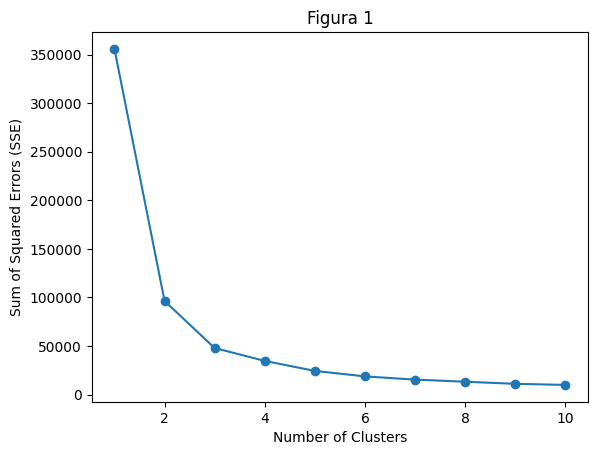

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def find_optimal_clusters_kmeans(data, max_k):
    sse = []  # Sum of squared errors
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10).fit(data)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, max_k + 1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Figura 1")
    plt.show()


find_optimal_clusters_kmeans(df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']], 10)


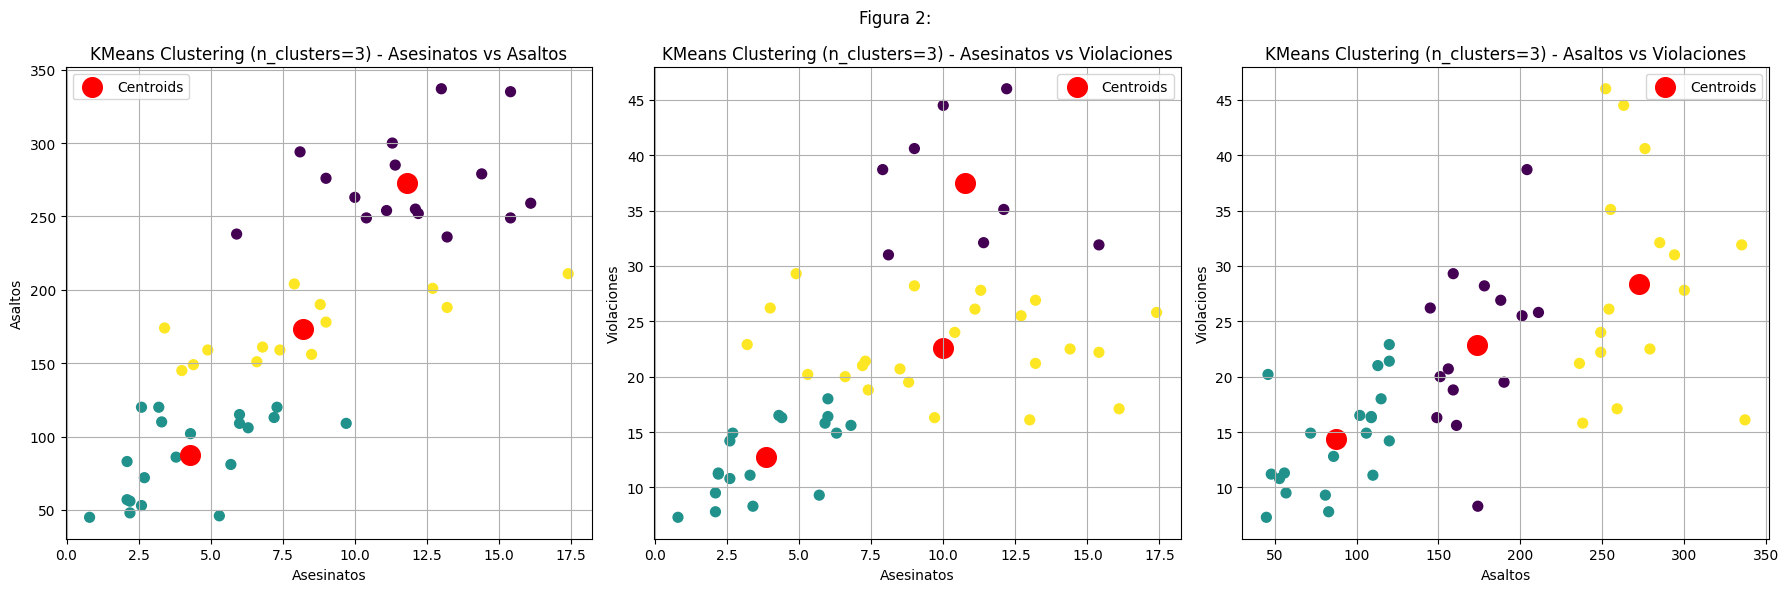

In [5]:
# Supongamos que 'df' es tu DataFrame

# Seleccionar las columnas relevantes
features = ['Asesinatos', 'Asaltos', 'Violaciones']

# Generar todas las combinaciones posibles de 2 columnas
column_combinations = list(combinations(features, 2))

# Calcular el número de subgráficas necesarias
num_plots = len(column_combinations)

# Configurar el diseño de la figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()

# Iterar sobre las combinaciones y realizar clustering KMeans
for i, combination in enumerate(column_combinations):
    # Seleccionar las columnas para la combinación actual
    data = df[list(combination)].values

    # Aplicar KMeans con n_clusters=3
    kmeans = KMeans(n_clusters=3, n_init=10)
    clusters = kmeans.fit_predict(data)
    # Graficar los resultados en la subgráfica actual
    axes[i].scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='o', label="Centroids")

    # Etiquetas y título
    axes[i].set_title(f'KMeans Clustering (n_clusters=3) - {combination[0]} vs {combination[1]}')
    axes[i].set_xlabel(combination[0])
    axes[i].set_ylabel(combination[1])
    axes[i].legend()
    axes[i].grid(True)

# Eliminar la última subgráfica vacía
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])


plt.suptitle('Figura 2:')
plt.tight_layout()

plt.show()

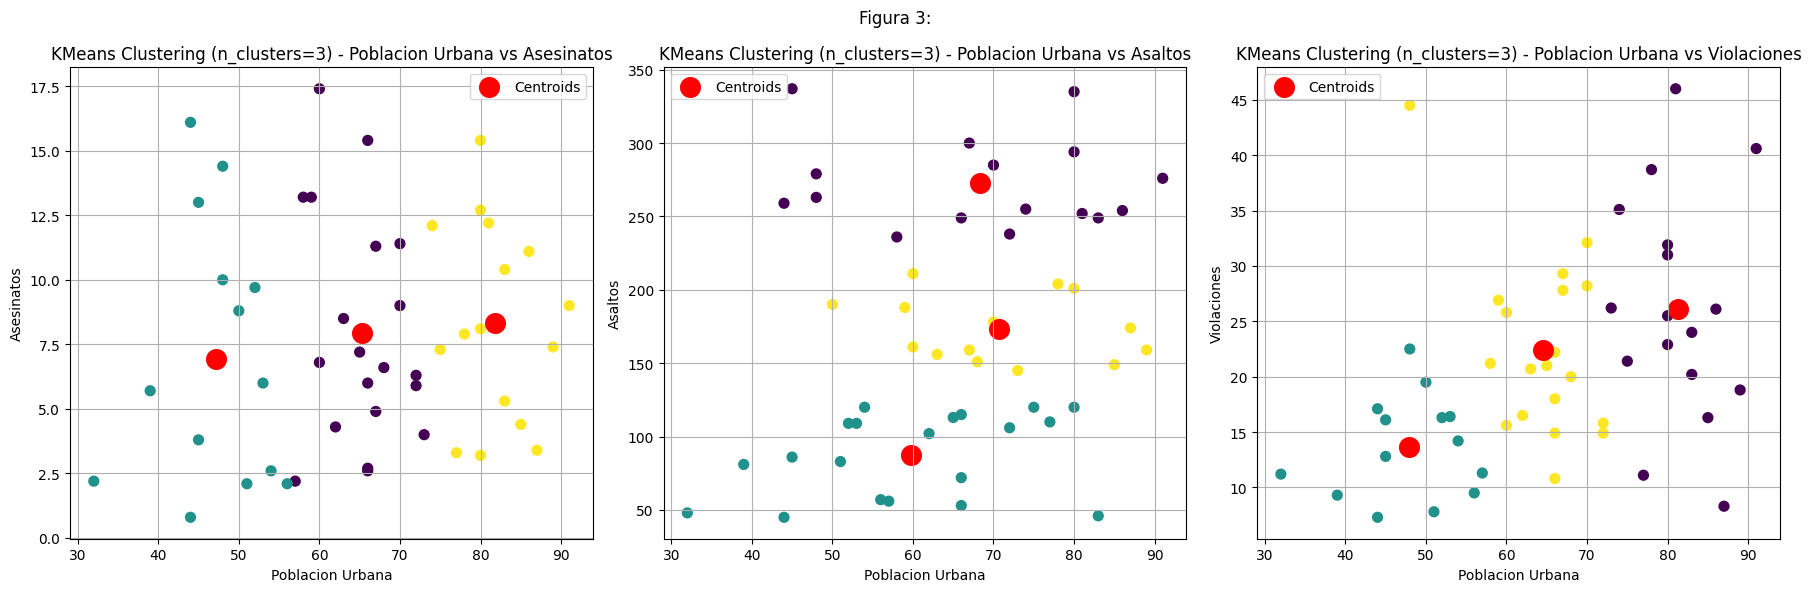

In [6]:

# Seleccionar las combinaciones deseadas
desired_combinations = [('Poblacion Urbana', 'Asesinatos'),
                        ('Poblacion Urbana', 'Asaltos'),
                        ('Poblacion Urbana', 'Violaciones')]

# Configurar el diseño de la figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Iterar sobre las combinaciones deseadas y realizar clustering KMeans
for i, combination in enumerate(desired_combinations):
    # Seleccionar las columnas para la combinación actual
    data = df[list(combination)].values

    # Aplicar KMeans con n_clusters=3
    kmeans = KMeans(n_clusters=3, n_init=10)
    clusters = kmeans.fit_predict(data)

    # Graficar los resultados en la subgráfica actual
    axes[i].scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='o', label="Centroids")

    # Etiquetas y título
    axes[i].set_title(f'KMeans Clustering (n_clusters=3) - {combination[0]} vs {combination[1]}')
    axes[i].set_xlabel(combination[0])
    axes[i].set_ylabel(combination[1])
    axes[i].legend()
    axes[i].grid(True)

# Ajustes de diseño
plt.suptitle('Figura 3:')
plt.tight_layout()
plt.show()

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px

# Supongamos que 'data' es tu conjunto de datos (asegúrate de tener los datos que deseas usar)
data = df[['Asaltos', 'Asesinatos', 'Violaciones', 'Poblacion Urbana']].values

# Aplicar KMeans con n_clusters=3
random_seed = 6  # Puedes cambiar este número si lo deseas
kmeans = KMeans(n_clusters=3, random_state=random_seed, n_init=10)
clusters = kmeans.fit_predict(data)

# Obtener las asignaciones de cluster para cada estado
cluster_assignments = kmeans.predict(data)

# Agregar la información de cluster al DataFrame original
df['Cluster'] = cluster_assignments

# Mapear colores a los clusters
cluster_colors = {0: 'red', 1: 'orange', 2: 'green'}  # Invertir el mapeo para verde y rojo (porque el grafico me los invertia)
df['Color'] = df['Cluster'].map(cluster_colors)

# Crear gráfico interactivo 3D con plotly express
fig = px.scatter_3d(df, x='Asaltos', y='Asesinatos', z='Violaciones', color='Color',
                    size_max=30, opacity=0.7, symbol='Cluster', labels={'Color': 'Cluster'},
                    hover_data={'Estado': True, 'Asaltos': True, 'Asesinatos': True, 'Violaciones': True, 'Poblacion Urbana': True, 'Cluster': False},
                    title='KMeans Clustering (n_clusters=3)',
                    template='plotly_dark',
                    color_discrete_map=cluster_colors,
                    color_discrete_sequence=list(cluster_colors.values()))

# Personalizar la apariencia del gráfico
fig.update_layout(scene=dict(
                    xaxis_title='Asaltos',
                    yaxis_title='Asesinatos',
                    zaxis_title='Violaciones'))

# Mostrar el gráfico interactivo
fig.show()

In [8]:
# Calcular la media para cada cluster
cluster_means = df.groupby('Cluster')[['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana']].mean()

# Visualizar la media de cada cluster
print(cluster_means)

         Asesinatos     Asaltos  Violaciones  Poblacion Urbana
Cluster                                                       
0          4.270000   87.550000    14.390000         59.750000
1          8.214286  173.285714    22.842857         70.642857
2         11.812500  272.562500    28.375000         68.312500


In [9]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Color
0,Alabama,13.2,236,58,21.2,2,green
1,Alaska,10.0,263,48,44.5,2,green
2,Arizona,8.1,294,80,31.0,2,green
3,Arkansas,8.8,190,50,19.5,1,orange
4,California,9.0,276,91,40.6,2,green
5,Colorado,7.9,204,78,38.7,1,orange
6,Connecticut,3.3,110,77,11.1,0,red
7,Delaware,5.9,238,72,15.8,2,green
8,Florida,15.4,335,80,31.9,2,green
9,Georgia,17.4,211,60,25.8,1,orange


In [10]:
import plotly.graph_objects as go

# Mapeo de nombres de estados a abreviaturas
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Crea el objeto Choropleth
fig = go.Figure(go.Choropleth(
    locations=df['Estado'].map(state_abbr),  # Abreviaturas de estados
    locationmode='USA-states',
    z=df['Cluster'],  # Valores para la asignación de colores
    text=df['Estado'],
    colorscale=[[0, 'lightyellow'], [0.5, 'peachpuff'], [1, 'lightpink']],  # Escala de colores
    colorbar_title='Peligrosidad'
))

# Personaliza el diseño del mapa
fig.update_layout(
    title_text='Mapa de Clusters por Peligrosidad',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True,
        lakecolor='lightskyblue',
    ),
)

# Muestra el mapa
fig.show()

###• Relación entre la Cantidad de Población y la Tasa de Crimen:
###La cantidad de población no parece estar directamente correlacionada con la tasa de crimen en los estados. Se observa que, a pesar de las variaciones en la población urbana, los niveles de crimen (medidos por asaltos y asesinatos) no siguen una tendencia proporcional. Sin embargo, es interesante destacar que, en el caso de las violaciones, hay una correlación ligeramente más pronunciada. Estados con mayores poblaciones urbanas tienden a mostrar tasas de violaciones más altas. Esto sugiere que, para las violaciones, la población podría tener un impacto más significativo en comparación con otros tipos de crímenes. (Figura 1).

###• Correlación entre Diferentes Tipos de Crímenes:
###Existe una fuerte correlación entre los diferentes tipos de crímenes. La figura 2 muestra claramente que los estados con mayores tasas de asaltos tienden a tener también mayores tasas de asesinatos y violaciones. Esta correlación sugiere patrones comunes en la distribución de diferentes tipos de crímenes a lo largo de los estados.

###• Análisis de Clusters:
###La figura 3 y las medias de cada cluster revelan que los estados han sido agrupados en tres categorías distintas de peligrosidad, identificadas por los colores amarillo, verde y rojo.
###Los estados en el cluster rojo muestran niveles más altos de crimen en comparación con los estados en los clusters verde y amarillo.
###La agrupación no parece depender únicamente de la cantidad de población, ya que estados con poblaciones similares pueden pertenecer a clusters diferentes.